# Confounds

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.patches as patches
from sklearn.linear_model import LinearRegression

pymc.model.Model

## Fork example

```
  X  ◀────  Z  ────▶  Y  
```

<Axes: xlabel='X', ylabel='Y'>

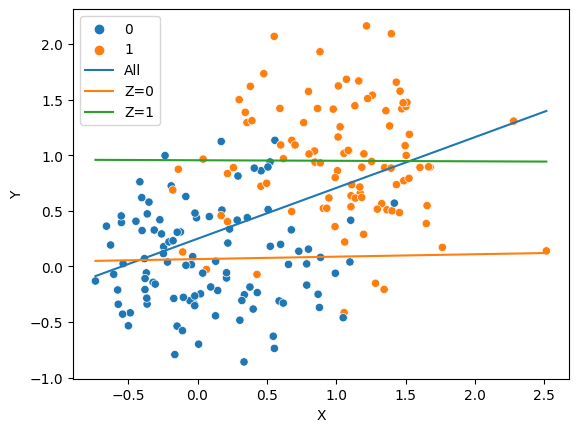

In [38]:
n = 200
sigma = 0.5
Z = np.random.choice(2, size=n)
X = np.random.normal(Z, sigma)
Y = np.random.normal(Z, sigma)
df = pd.DataFrame(zip(X,Y,Z), columns=list('XYZ'))
# fit linear models
df_z0 = df[df.Z == 0]
df_z1 = df[df.Z == 1]
lm_all = LinearRegression().fit(df.X.values.reshape(-1, 1), df.Y)
lm_z0 =  LinearRegression().fit(df_z0.X.values.reshape(-1, 1), df_z0.Y)
lm_z1 =  LinearRegression().fit(df_z1.X.values.reshape(-1, 1), df_z1.Y)
xs = np.linspace(df.X.min(), df.X.max(), 2)
sns.scatterplot(data=df, x='X', y='Y', hue='Z')
sns.lineplot(x=xs, y=lm_all.predict(xs.reshape(-1, 1)), label='All')
sns.lineplot(x=xs, y=lm_z0.predict(xs.reshape(-1, 1)), label='Z=0')
sns.lineplot(x=xs, y=lm_z1.predict(xs.reshape(-1, 1)), label='Z=1')
